In [5]:
#import librarys
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#import data

df = pd.read_csv('CARS SALES.csv')
df.shape

(23906, 16)

In [7]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [11]:
#changing price for easier typing

df.rename(columns={'Price ($)': 'Car_Price'}, inplace=True)


In [13]:
#check null values

df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Car_Price        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [15]:
#drop null values

df = df.dropna()

In [17]:
df = df.drop_duplicates()

In [15]:
#check the data type 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Car_Price      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB


In [17]:
#changing non correct data type 

df['Date'] = pd.to_datetime(df['Date'])
df['Annual Income'] = df['Annual Income'].astype(float)
df['Car_Price'] = df['Car_Price'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual Income  23905 non-null  float64       
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Car_Price      23905 non-null  float64       
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

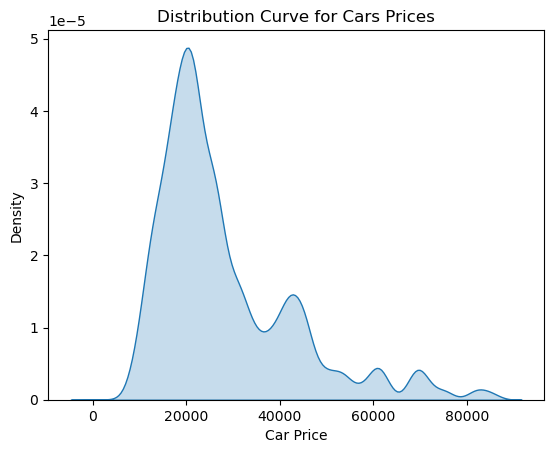

In [37]:
# distribution curve shows that most cars prices fall between 10000 and 30000

import seaborn as sns
sns.kdeplot(df['Car_Price'], fill=True)
plt.title('Distribution Curve for Cars Prices')
plt.xlabel('Car Price')
plt.ylabel('Density')
plt.show()

Text(0.5, 0, 'Units Sold')

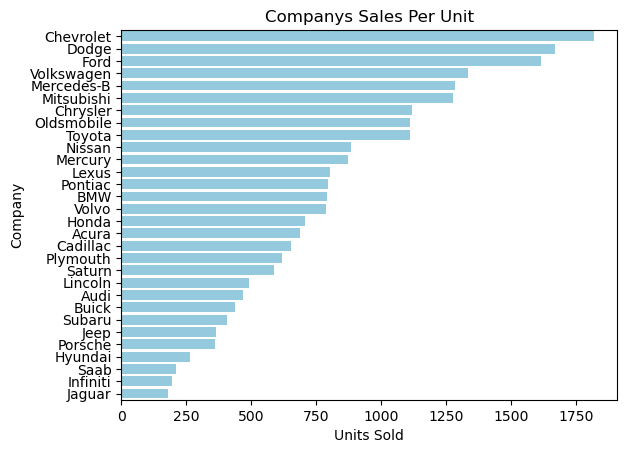

In [50]:
# company units sales

order = df['Company'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df ,y='Company',order=order,color='skyblue')
plt.title("Companys Sales Per Unit")
plt.xlabel('Units Sold')

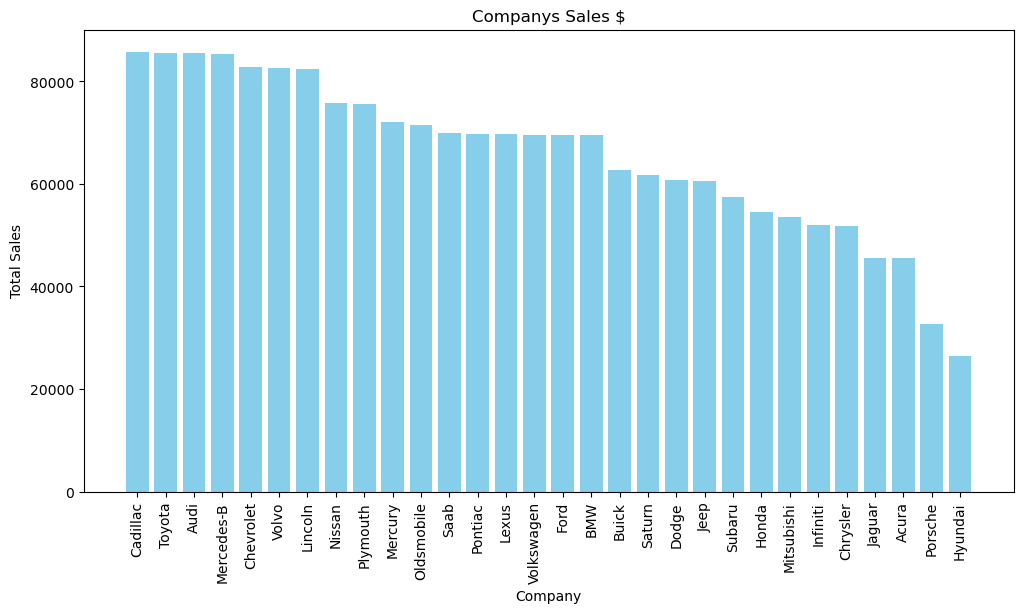

In [52]:
# company sales
sorted_data = df.sort_values('Car_Price', ascending=False)
plt.figure(figsize=(12, 6))  # Adjust width and height
plt.bar(sorted_data['Company'], sorted_data['Car_Price'], color='skyblue')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='center')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Total Sales')
plt.title('Companys Sales $')

plt.show()

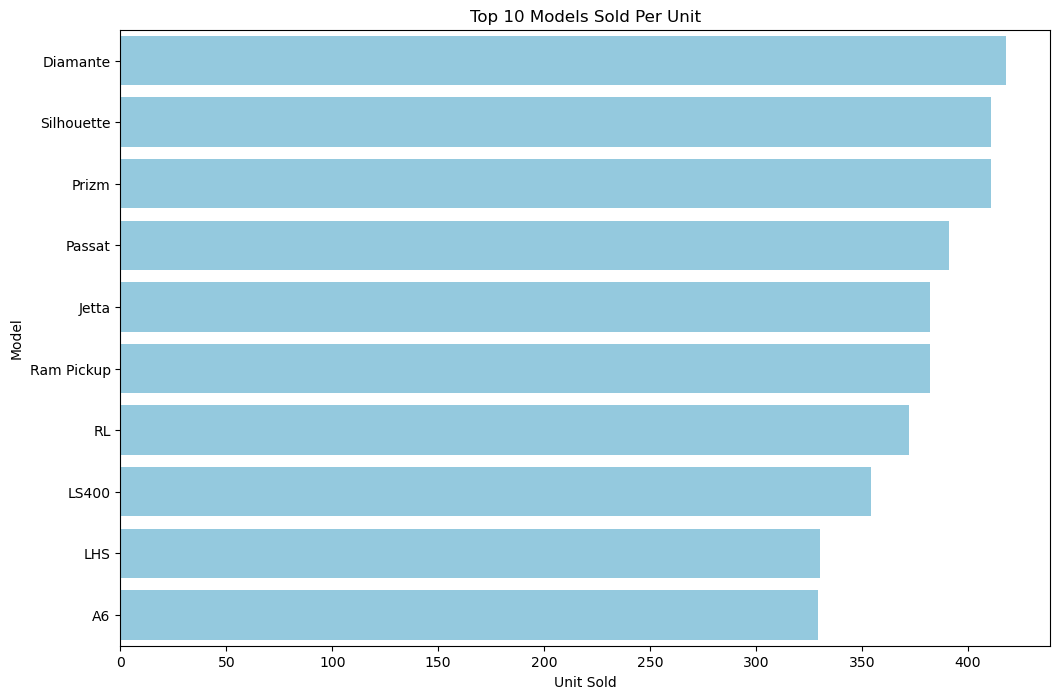

In [56]:
top_10_models = df['Model'].value_counts().nlargest(10).index

# Set plot size
plt.figure(figsize=(12, 8))

# Draw the countplot with only the top 10 models
sns.countplot(data=df, y='Model', order=top_10_models, color='skyblue')

# Add a title
plt.title('Top 10 Models Sold Per Unit')
plt.xlabel('Unit Sold')
# Show the plot
plt.show()

Text(0.5, 0, 'Unit Sold')

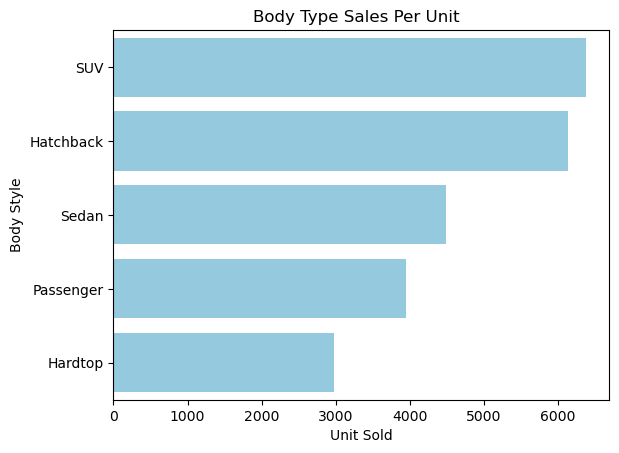

In [58]:
order = df['Body Style'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df ,y='Body Style',order=order,color='skyblue')
plt.title('Body Type Sales Per Unit  ')
plt.xlabel('Unit Sold')

Text(0.5, 0, 'Unit Sold')

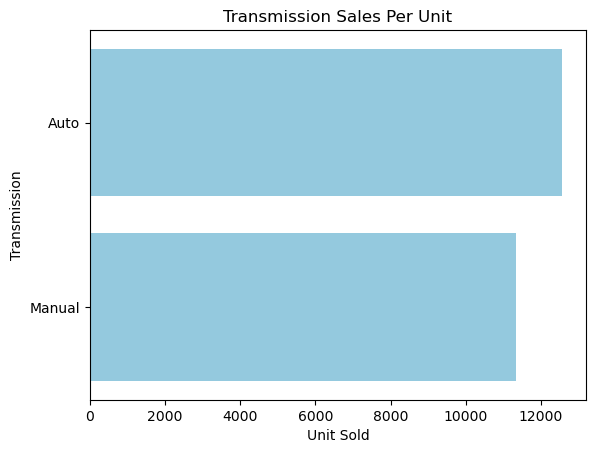

In [62]:

order = df['Transmission'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df ,y=df['Transmission'],order=order,color='skyblue')
plt.title('Transmission Sales Per Unit')
plt.xlabel('Unit Sold')

Text(0.5, 1.0, 'Dealers Sales')

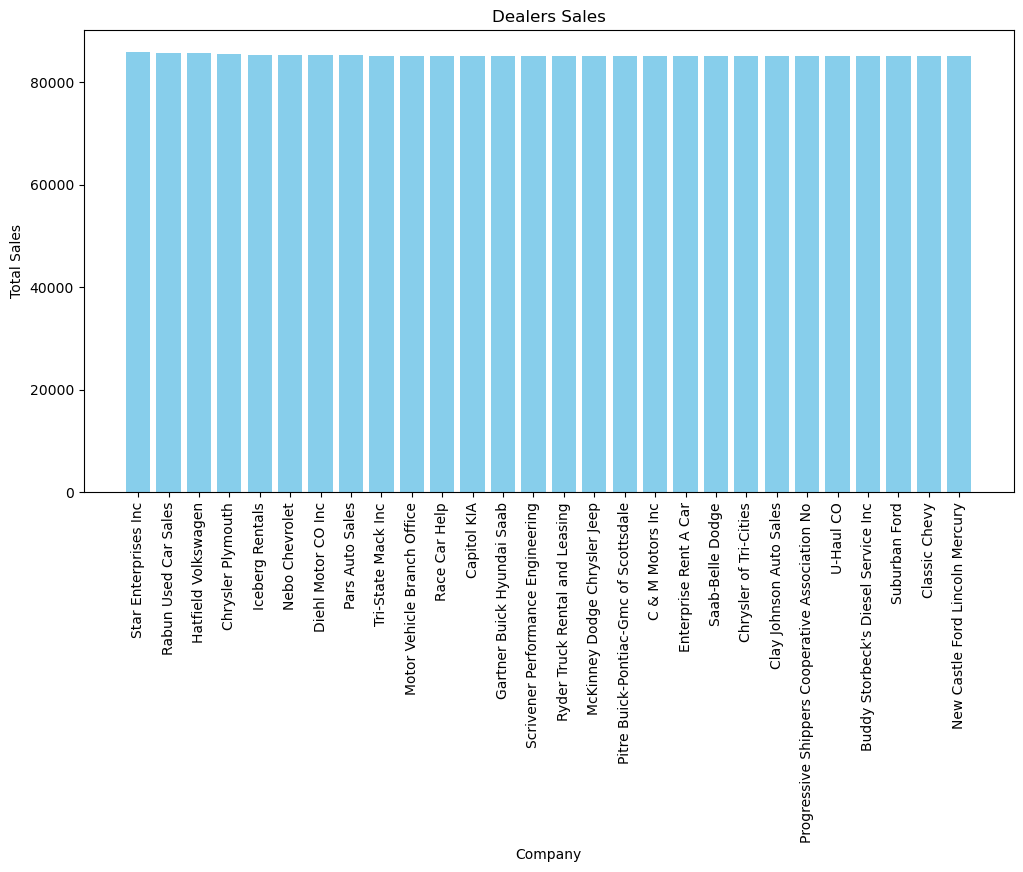

In [29]:
sorted_data = df.sort_values('Car_Price', ascending=False)
plt.figure(figsize=(12, 6))  # Adjust width and height
plt.bar(sorted_data['Dealer_Name'], sorted_data['Car_Price'], color='skyblue')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='center')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Total Sales')
plt.title('Dealers Sales')

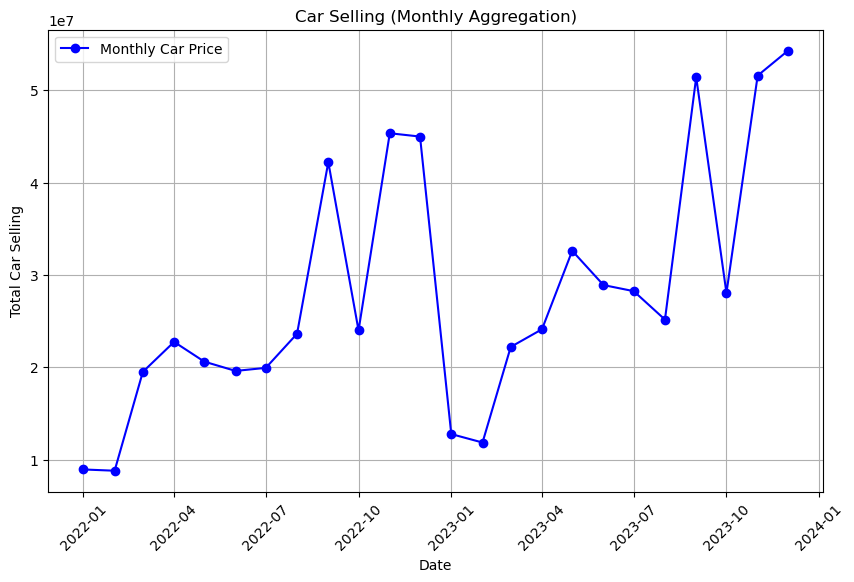

In [31]:
#sales trends

aggregated_data = df.groupby(df['Date'].dt.to_period('M'))['Car_Price'].sum().reset_index()
aggregated_data['Date'] = aggregated_data['Date'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['Date'], aggregated_data['Car_Price'], marker='o', color='blue', label='Monthly Car Price')
plt.xlabel('Date')
plt.ylabel('Total Car Selling')
plt.title('Car Selling (Monthly Aggregation)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [21]:
#split the data by gender
df_male = df[df['Gender']=='Male']
df_female = df[df['Gender']=='Female']

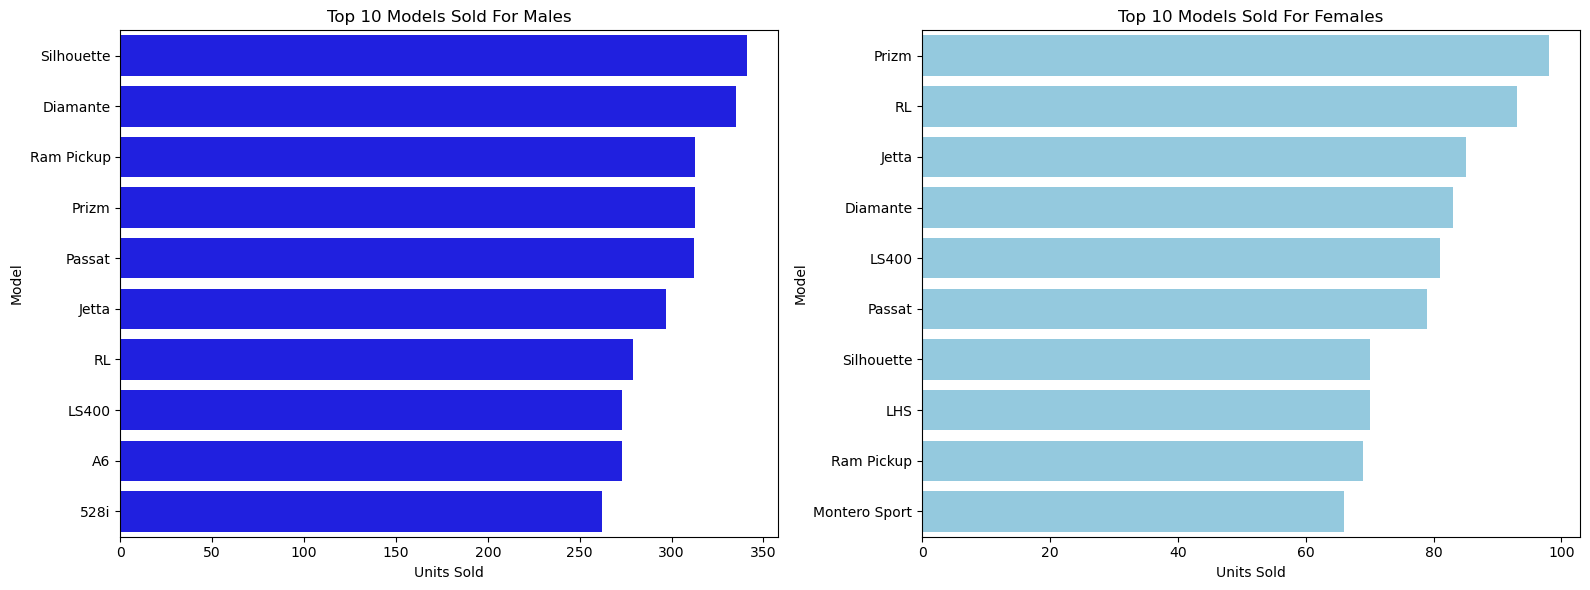

In [23]:
top_male = df_male['Model'].value_counts().head(10).index
top_female = df_female['Model'].value_counts().head(10).index
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# First plot (Male data)
sns.countplot(
    data=df_male,
    y="Model",
    order=top_male,
    color="blue",
    ax=axes[0]
)
axes[0].set_title("Top 10 Models Sold For Males")
axes[0].set_xlabel("Units Sold")
axes[0].set_ylabel("Model")

# Second plot (Female data)
sns.countplot(
    data=df_female,
    y="Model",
    order=top_female,
    color="skyblue",
    ax=axes[1]
)
axes[1].set_title("Top 10 Models Sold For Females")
axes[1].set_xlabel("Units Sold")
axes[1].set_ylabel("Model")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

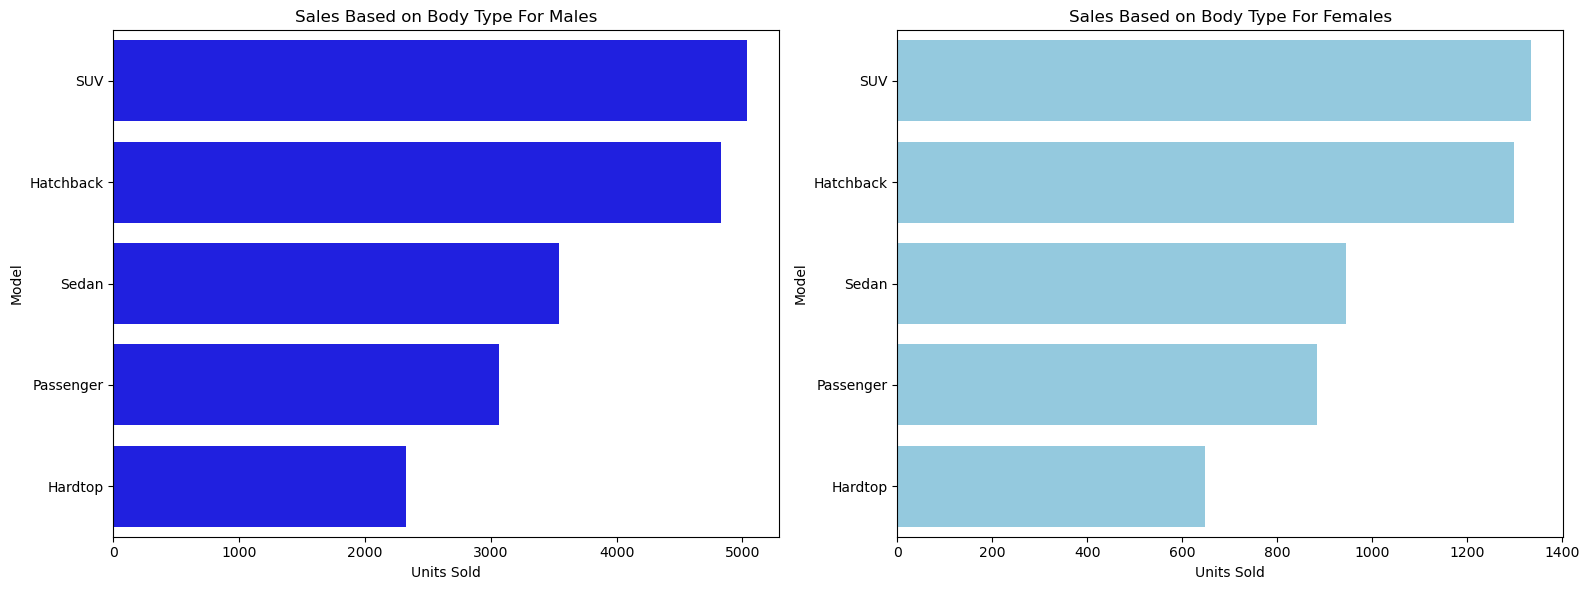

In [25]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
order_male = df_male['Body Style'].value_counts().sort_values(ascending=False).index
order_female = df_female['Body Style'].value_counts().sort_values(ascending=False).index
# First plot (Male data)
sns.countplot(
    data=df_male,
    y="Body Style",
    order = order_male,
    color="blue",
    ax=axes[0]
)
axes[0].set_title("Sales Based on Body Type For Males")
axes[0].set_xlabel("Units Sold")
axes[0].set_ylabel("Model")

# Second plot (Female data)
sns.countplot(
    data=df_female,
    y="Body Style",
    order = order_female,
    color="skyblue",
    ax=axes[1]
)
axes[1].set_title("Sales Based on Body Type For Females")
axes[1].set_xlabel("Units Sold")
axes[1].set_ylabel("Model")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

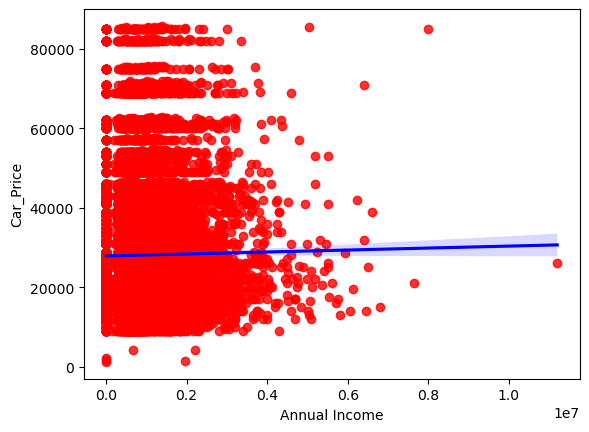

In [96]:
# lets see if there is relationship between income and sales
#scatter plot shows no relationship

sns.regplot(x='Annual Income', y='Car_Price',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.show()